# TileDB OME-TIFF Conversion

In [1]:
import os

import cv2
import matplotlib.pylab as pylab
import tiledb

from tiledb.bioimg.converters.ome_tiff import OMETiffConverter
from tiledb.bioimg.openslide import TileDBOpenSlide

## Convert OME-TIFF to TileDB Slide

In [2]:
src = "../tests/data/CMU-1-Small-Region.ome.tiff"
dest = src + ".tiledb"
if not os.path.exists(dest):
    OMETiffConverter.to_tiledb(src, dest, level_min=0)

## Slide Group Contents

In [3]:
a = tiledb.open(os.path.join(dest, "l_0.tdb"))
a.schema

ArraySchema(
  domain=Domain(*[
    Dim(name='C', domain=(0, 2), tile=3, dtype='uint32'),
    Dim(name='Y', domain=(0, 2966), tile=1024, dtype='uint32'),
    Dim(name='X', domain=(0, 2219), tile=1024, dtype='uint32'),
  ]),
  attrs=[
    Attr(name='intensity', dtype='uint8', var=False, nullable=False, filters=FilterList([ZstdFilter(level=0), ])),
  ],
  cell_order='row-major',
  tile_order='row-major',
  capacity=10000,
  sparse=False,
)

## TileDB Slide Information

In [4]:
slide = TileDBOpenSlide(dest)
print("level_count:", slide.level_count)
print("dimensions:", slide.dimensions)
print("level_dimensions:", slide.level_dimensions)
print("level_downsamples:", slide.level_downsamples)
print("levels:", slide.levels)
print("group_properties:", slide.properties)

level_count: 2
dimensions: (2220, 2967)
level_dimensions: ((2220, 2967), (574, 768))
level_downsamples: (1.0, 3.865438534407666)
levels: (0, 1)
group_properties: {'axes': 'CYX', 'channels': '["RED", "GREEN", "BLUE"]', 'dataset_type': 'BIOIMG', 'fmt_version': 1, 'json_tiffwriter_kwargs': '{"bigtiff": true, "byteorder": ">", "append": false, "imagej": false, "ome": true}', 'levels': '[{"level": 0, "name": "l_0.tdb", "axes": "CYX", "shape": [3, 2967, 2220]}, {"level": 1, "name": "l_1.tdb", "axes": "CYX", "shape": [3, 768, 574]}]', 'pixel_depth': 1, 'pkg_version': '0.1.1.dev14+dirty'}


## Reading Slide whole levels

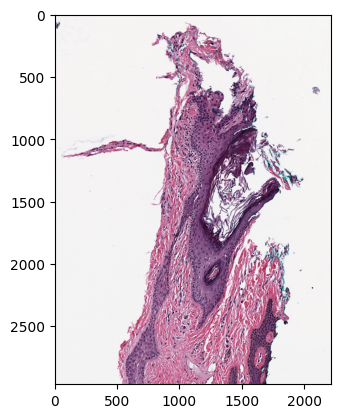

In [5]:
img3d = slide.read_level(0)
norm_img3d = cv2.normalize(src=img3d, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
pylab.imshow(norm_img3d)

## Reading Slide Data

In [6]:
img3d = slide.read_region((200,200), 0, slide.dimensions)
norm_img3d = cv2.normalize(src=img3d, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

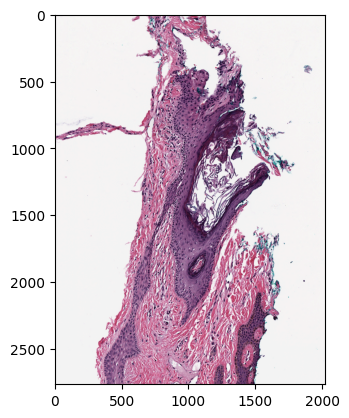

In [7]:
pylab.imshow(norm_img3d)

## Read level properties

In [8]:
print(slide.level_properties(0))

{'json_write_kwargs': '{"subifds": 1, "metadata": {"OME": {"Instrument": {"Objective": {"ID": "Objective:0:0", "NominalMagnification": 20.0}, "ID": "Instrument:0"}, "Image": [{"AcquisitionDate": "2009-12-29T09:59:15", "Description": "Aperio Image Library v11.2.1", "InstrumentRef": {"ID": "Instrument:0"}, "ObjectiveSettings": {"ID": "Objective:0:0"}, "Pixels": {"Channel": [{"LightPath": null, "ID": "Channel:0:0", "SamplesPerPixel": 1}, {"LightPath": null, "ID": "Channel:0:1", "SamplesPerPixel": 1}, {"LightPath": null, "ID": "Channel:0:2", "SamplesPerPixel": 1}], "TiffData": {"IFD": 0, "PlaneCount": 3}, "BigEndian": true, "DimensionOrder": "XYZCT", "ID": "Pixels:0", "Interleaved": false, "PhysicalSizeX": 0.499, "PhysicalSizeXUnit": "\\u00b5m", "PhysicalSizeY": 0.499, "PhysicalSizeYUnit": "\\u00b5m", "SignificantBits": 8, "SizeC": 3, "SizeT": 1, "SizeX": 2220, "SizeY": 2967, "SizeZ": 1, "Type": "uint8"}, "ID": "Image:0", "Name": ""}, {"AcquisitionDate": "2009-12-29T09:59:15", "Description